<a href="https://colab.research.google.com/github/Hernandez484/01.01-PROYECTO-KAGGLE/blob/main/01_exploraci%C3%B3n_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

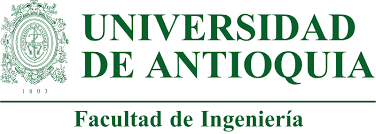

# <font color='056938'> **01.01 - PROYECTO KAGGLE - </font> <font color='8EC044'> Entrega 1** </font>

## <font color='157699'> **Paso 1:** </font>

In [24]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()

In [27]:
import inspect
from local.lib.rlxmoocapi import session
session.LoginSequence(endpoint=init.endpoint, course_id=init.course_id, lab_id="L01.01", varname="student");

logging in as andrea.hernandez4@udea.edu.co ... please wait


error: incorrect user/pwd (set session.debug=True for tracebacks)

## <font color='157699'> **Paso 2: Descargar datos directamente desde Kaggle** </font>

- Se creo un archivo kaggle.jsoncon con mi token de autenticación (en kaggle $\to$ Hago clic en el icono de usuario en la parte superior derecha $\to$
ajustes $\to$ API crea un nuevo token);

- Subirlo a este espacio de trabajo del cuaderno;

- Y ejecutar la siguiente celda.

In [5]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!chmod 600 ./kaggle.json
!kaggle competitions download -c udea-ai4eng-20242

 84% 17.0M/20.1M [00:00<00:00, 72.4MB/s]
100% 20.1M/20.1M [00:00<00:00, 73.9MB/s]


## <font color='157699'> **Paso 3: Descomprimir e inspeccionar datos** </font>

Se descomprime el fichero.

In [6]:
!unzip udea*.zip > /dev/null

In [7]:
!wc *.csv

   296787    296787   4716673 submission_example.csv
   296787   4565553  50135751 test.csv
   692501  10666231 118025055 train.csv
  1286075  15528571 172877479 total


## <font color='157699'> **Paso 4: Se carga `train.csv` con la librería `Pandas`** </font>

In [8]:
import pandas as pd
import numpy as np

z = pd.read_csv("train.csv")
print ("shape of loaded dataframe", z.shape)

shape of loaded dataframe (692500, 12)


In [ ]:
z.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo


## <font color='157699'> **Paso 5: Explaración de datos usando `train.CSV`** </font>

- Se tiene que predecir la etiqueta `RENDIMIENTO_GLOBAL` usando el resto de los atributos.

- Se usaran los siguientes atributos para el modelo:

   - **PERIODO.**

   - **FAMI_ESTRATOVIVIENDA.**

   - **FAMI_EDUCACIONPADRE.**
   
   - **FAMI_EDUCACIONMADRE.**
   
   - **ESTU_PAGOMATRICULAPROPIO.**

   - **ESTU_HORASSEMANATRABAJA.**

   - **ESTU_VALORMATRICULAUNIVERSIDAD.**

In [9]:
z = z[['PERIODO', 'FAMI_ESTRATOVIVIENDA', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE', 'ESTU_PAGOMATRICULAPROPIO', 'ESTU_HORASSEMANATRABAJA', 'ESTU_VALORMATRICULAUNIVERSIDAD', 'RENDIMIENTO_GLOBAL']]
z.head()

,PERIODO,FAMI_ESTRATOVIVIENDA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,ESTU_HORASSEMANATRABAJA,ESTU_VALORMATRICULAUNIVERSIDAD,RENDIMIENTO_GLOBAL
0,20212,Estrato 3,Técnica o tecnológica incompleta,Postgrado,No,Menos de 10 horas,Entre 5.5 millones y menos de 7 millones,medio-alto
1,20212,Estrato 3,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,0,Entre 2.5 millones y menos de 4 millones,bajo
2,20203,Estrato 3,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,Más de 30 horas,Entre 2.5 millones y menos de 4 millones,bajo
3,20195,Estrato 4,No sabe,Secundaria (Bachillerato) completa,No,0,Entre 4 millones y menos de 5.5 millones,alto
4,20212,Estrato 3,Primaria completa,Primaria completa,No,Entre 21 y 30 horas,Entre 2.5 millones y menos de 4 millones,medio-bajo


Después de seleccionar los datos, se procede a inspeccionar la distribución del contenido de los atributos del **Modelo 1** y de la etiqueta `RENDIMIENTO_GLOBAL`:

<Axes: xlabel='FAMI_ESTRATOVIVIENDA'>

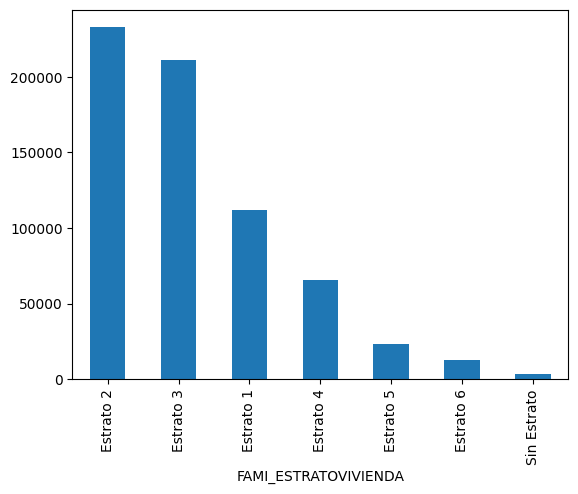

In [10]:
z.FAMI_ESTRATOVIVIENDA.value_counts().plot(kind='bar')

<Axes: xlabel='FAMI_EDUCACIONPADRE'>

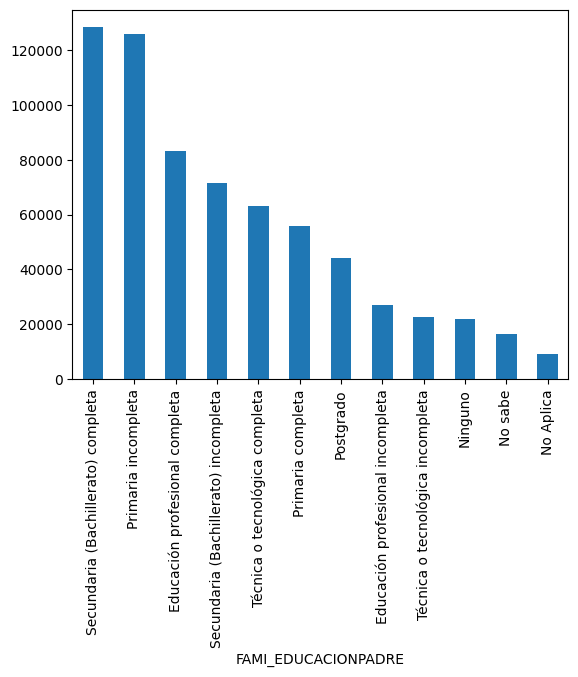

In [11]:
z.FAMI_EDUCACIONPADRE.value_counts().plot(kind='bar')

<Axes: xlabel='FAMI_EDUCACIONMADRE'>

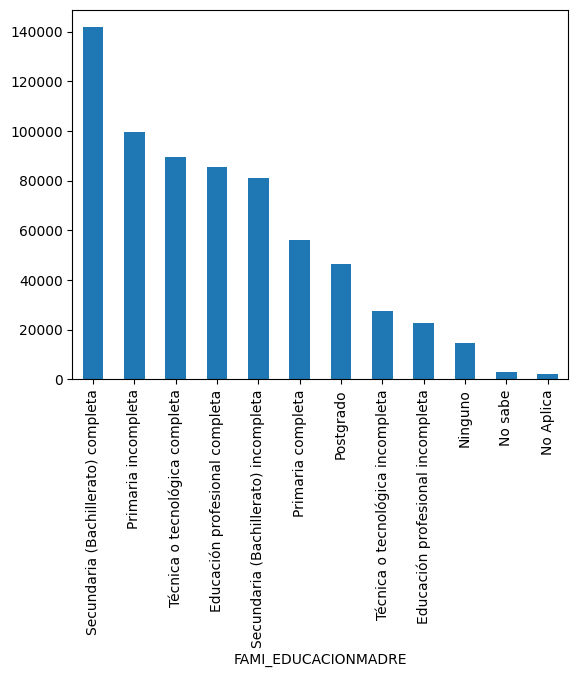

In [12]:
z.FAMI_EDUCACIONMADRE.value_counts().plot(kind='bar')

<Axes: xlabel='ESTU_PAGOMATRICULAPROPIO'>

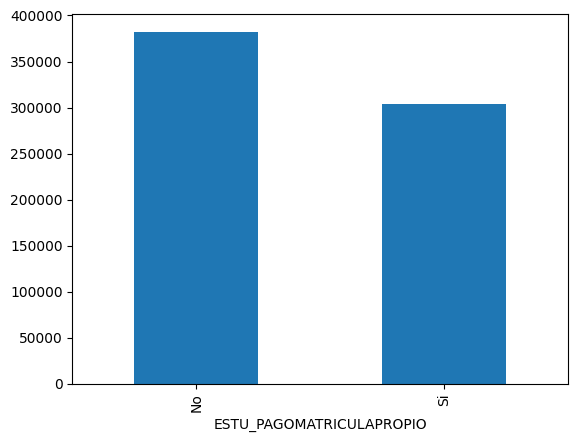

In [13]:
z.ESTU_PAGOMATRICULAPROPIO.value_counts().plot(kind='bar')

<Axes: xlabel='ESTU_HORASSEMANATRABAJA'>

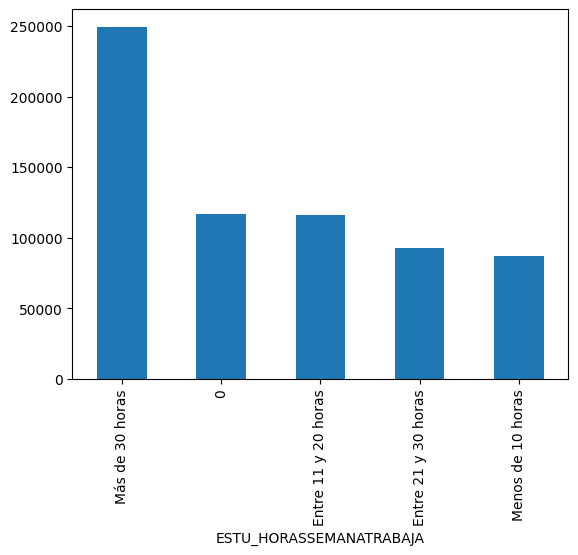

In [14]:
z.ESTU_HORASSEMANATRABAJA.value_counts().plot(kind='bar')

<Axes: xlabel='ESTU_VALORMATRICULAUNIVERSIDAD'>

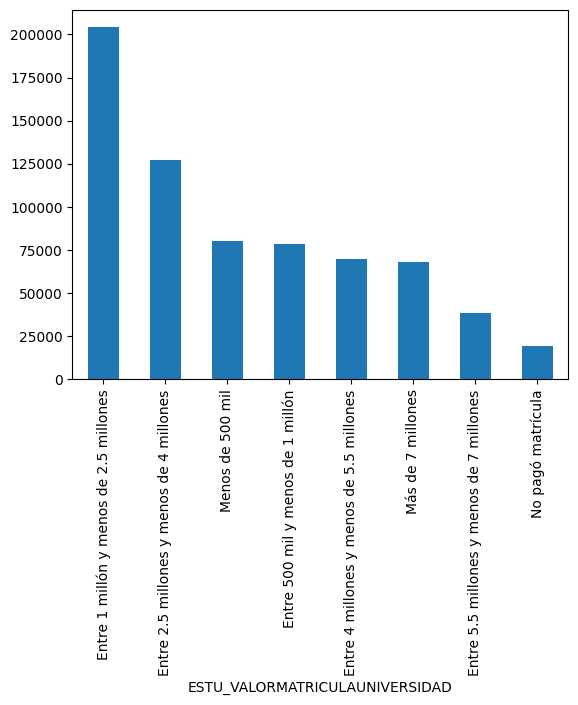

In [15]:
z.ESTU_VALORMATRICULAUNIVERSIDAD.value_counts().plot(kind='bar')

<Axes: xlabel='RENDIMIENTO_GLOBAL'>

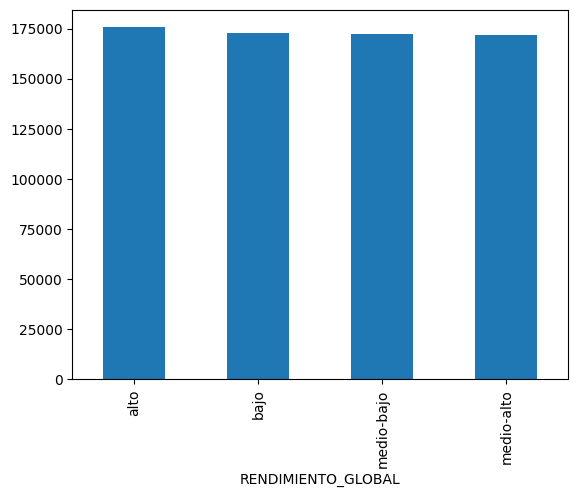

In [16]:
z.RENDIMIENTO_GLOBAL.value_counts().plot(kind='bar')

## <font color='157699'> **Paso 6: Inspeccionar visualmente si los atributos del Modelo 1, tienen un comportamiento distintivo con respecto a lo que se quiere predecir** </font>

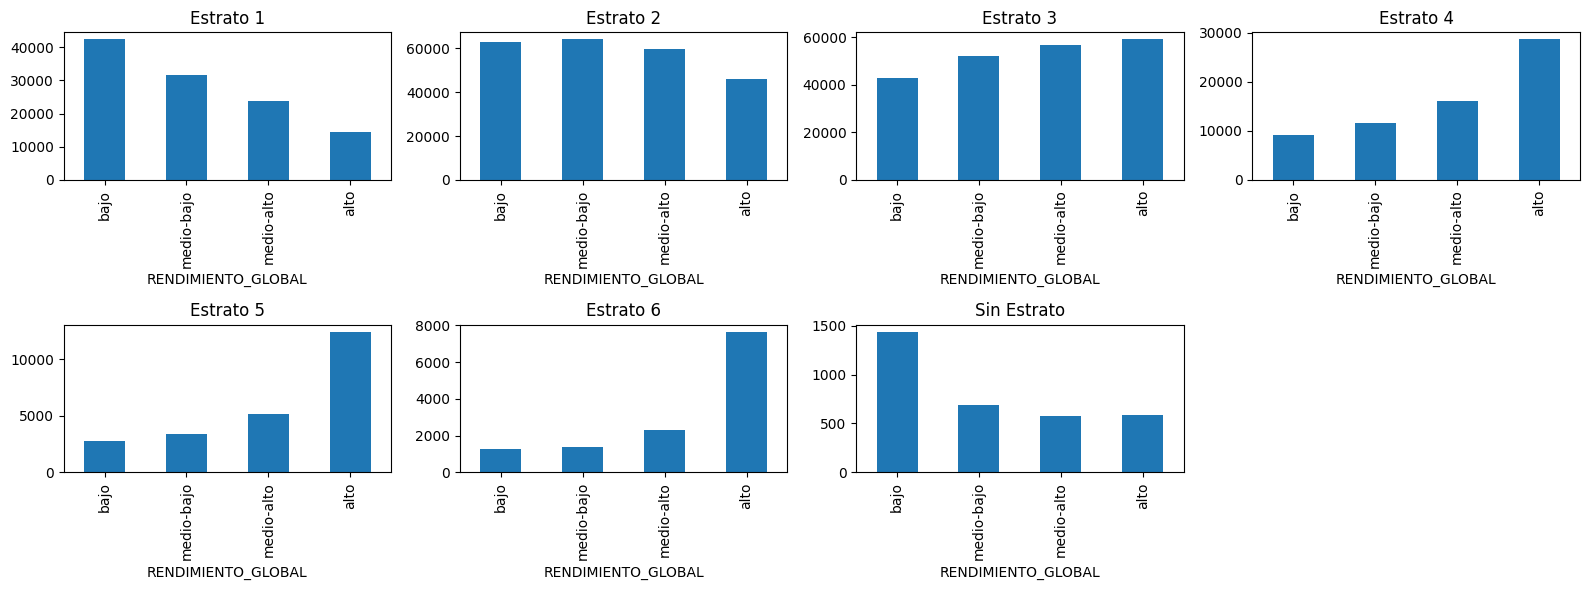

In [18]:
from rlxutils import subplots
import matplotlib.pyplot as plt

c = sorted(z.FAMI_ESTRATOVIVIENDA.value_counts().index)
for ax,ci in subplots(c, n_cols=4, usizex=4):
    zc = z[z.FAMI_ESTRATOVIVIENDA==ci]
    zc.RENDIMIENTO_GLOBAL.value_counts()[['bajo', 'medio-bajo', 'medio-alto', 'alto']].plot(kind='bar')
    plt.title(ci)

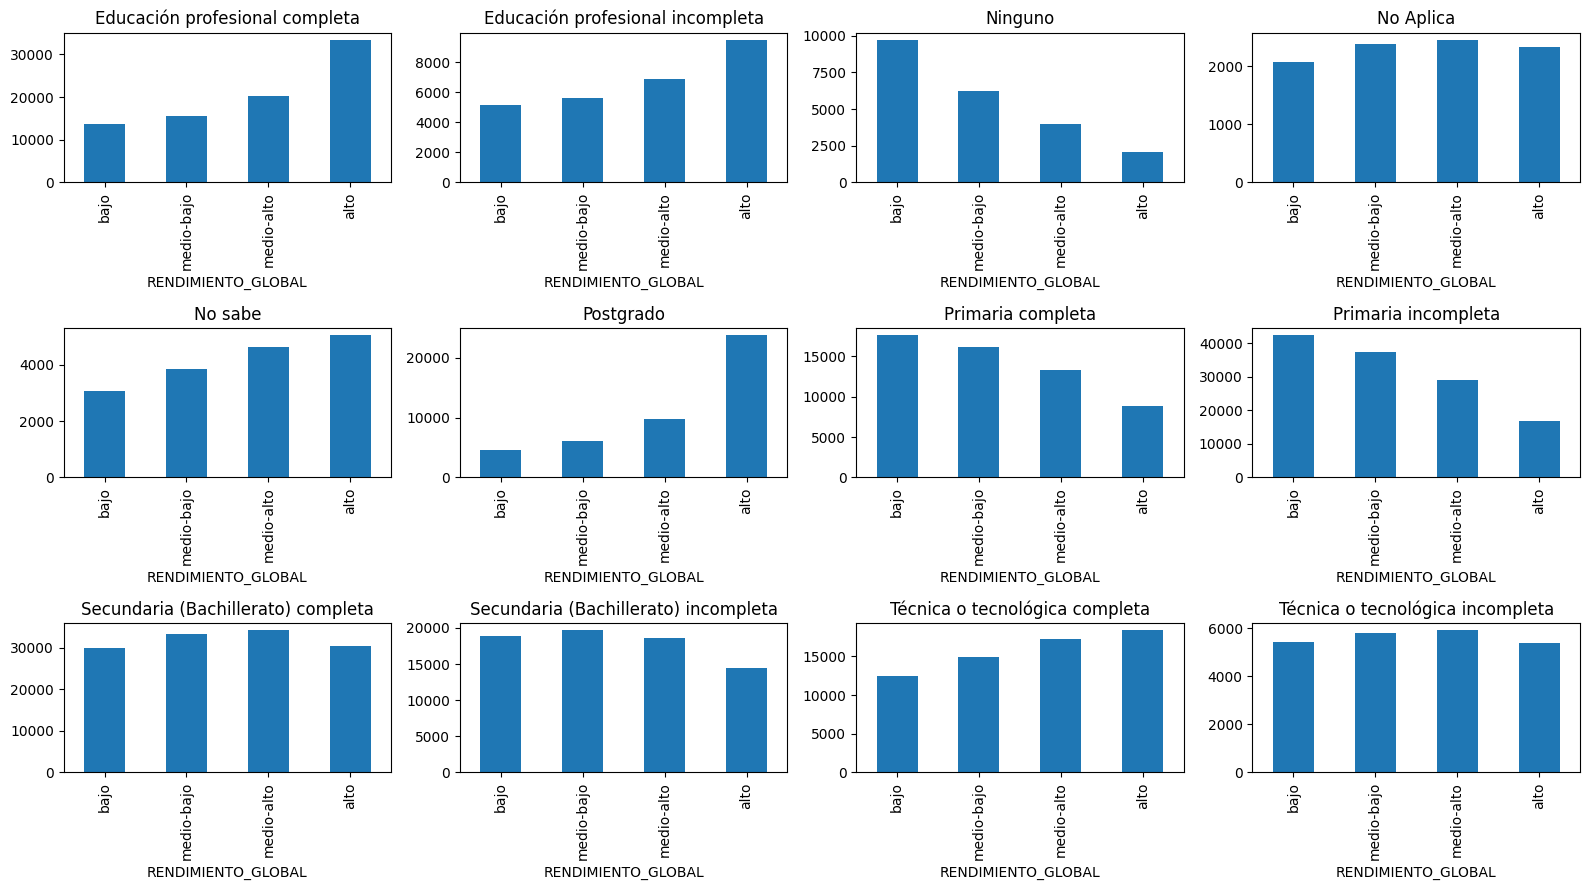

In [19]:
from rlxutils import subplots
import matplotlib.pyplot as plt

c = sorted(z.FAMI_EDUCACIONPADRE.value_counts().index)
for ax,ci in subplots(c, n_cols=4, usizex=4):
    zc = z[z.FAMI_EDUCACIONPADRE==ci]
    zc.RENDIMIENTO_GLOBAL.value_counts()[['bajo', 'medio-bajo', 'medio-alto', 'alto']].plot(kind='bar')
    plt.title(ci)

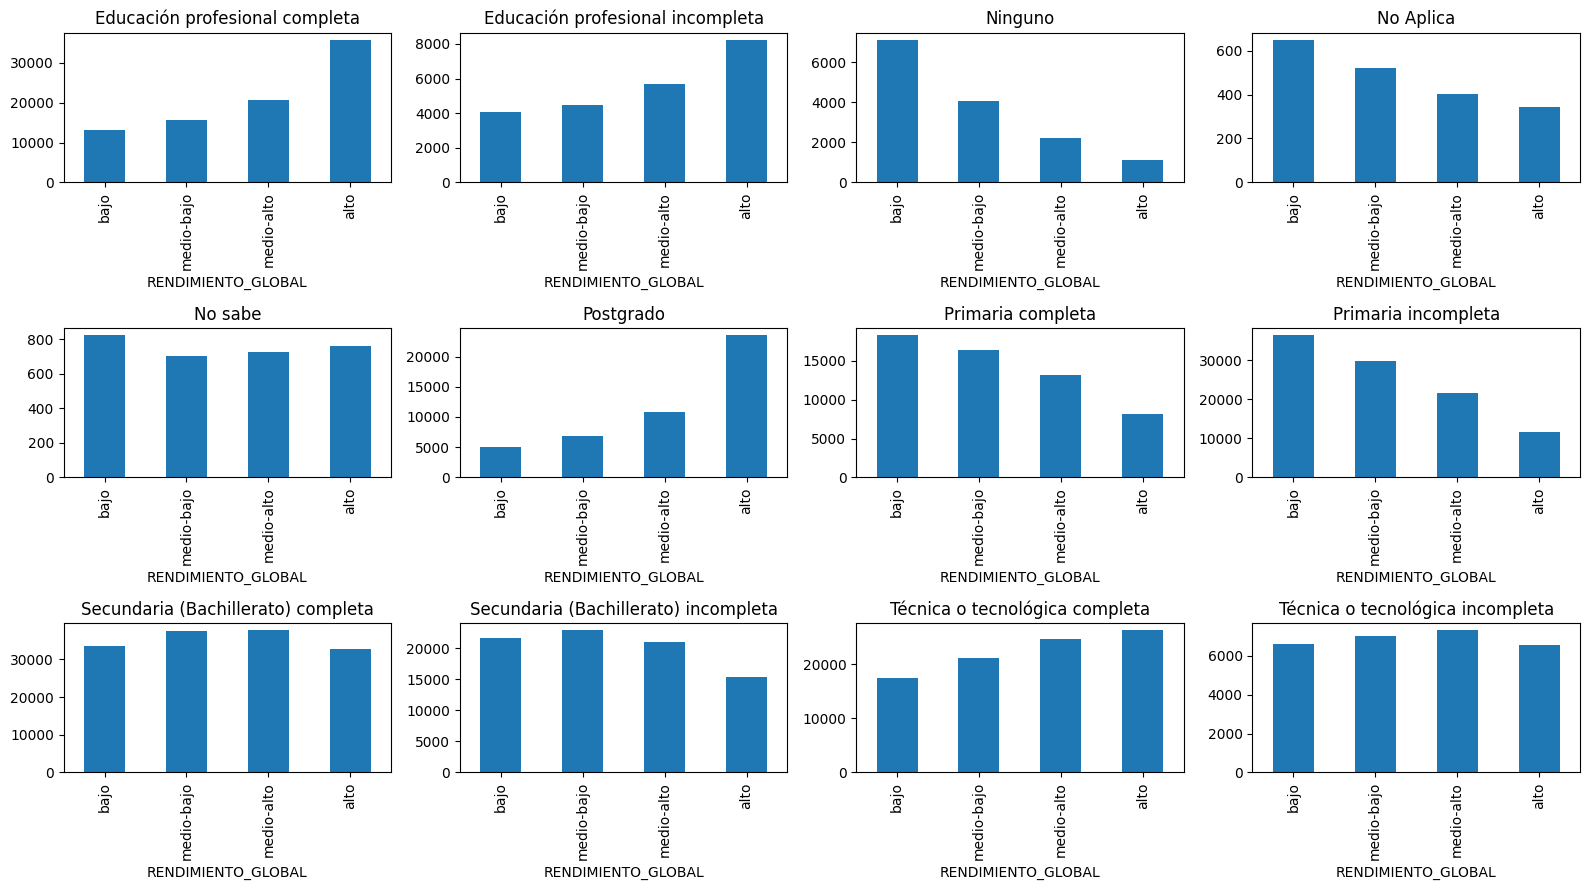

In [20]:
from rlxutils import subplots
import matplotlib.pyplot as plt

c = sorted(z.FAMI_EDUCACIONMADRE.value_counts().index)
for ax,ci in subplots(c, n_cols=4, usizex=4):
    zc = z[z.FAMI_EDUCACIONMADRE==ci]
    zc.RENDIMIENTO_GLOBAL.value_counts()[['bajo', 'medio-bajo', 'medio-alto', 'alto']].plot(kind='bar')
    plt.title(ci)

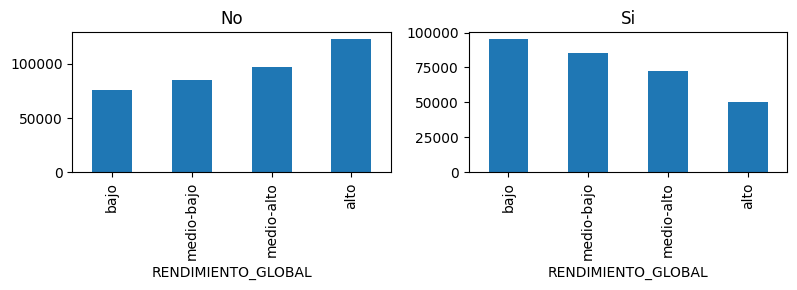

In [21]:
from rlxutils import subplots
import matplotlib.pyplot as plt

c = sorted(z.ESTU_PAGOMATRICULAPROPIO.value_counts().index)
for ax,ci in subplots(c, n_cols=4, usizex=4):
    zc = z[z.ESTU_PAGOMATRICULAPROPIO==ci]
    zc.RENDIMIENTO_GLOBAL.value_counts()[['bajo', 'medio-bajo', 'medio-alto', 'alto']].plot(kind='bar')
    plt.title(ci)

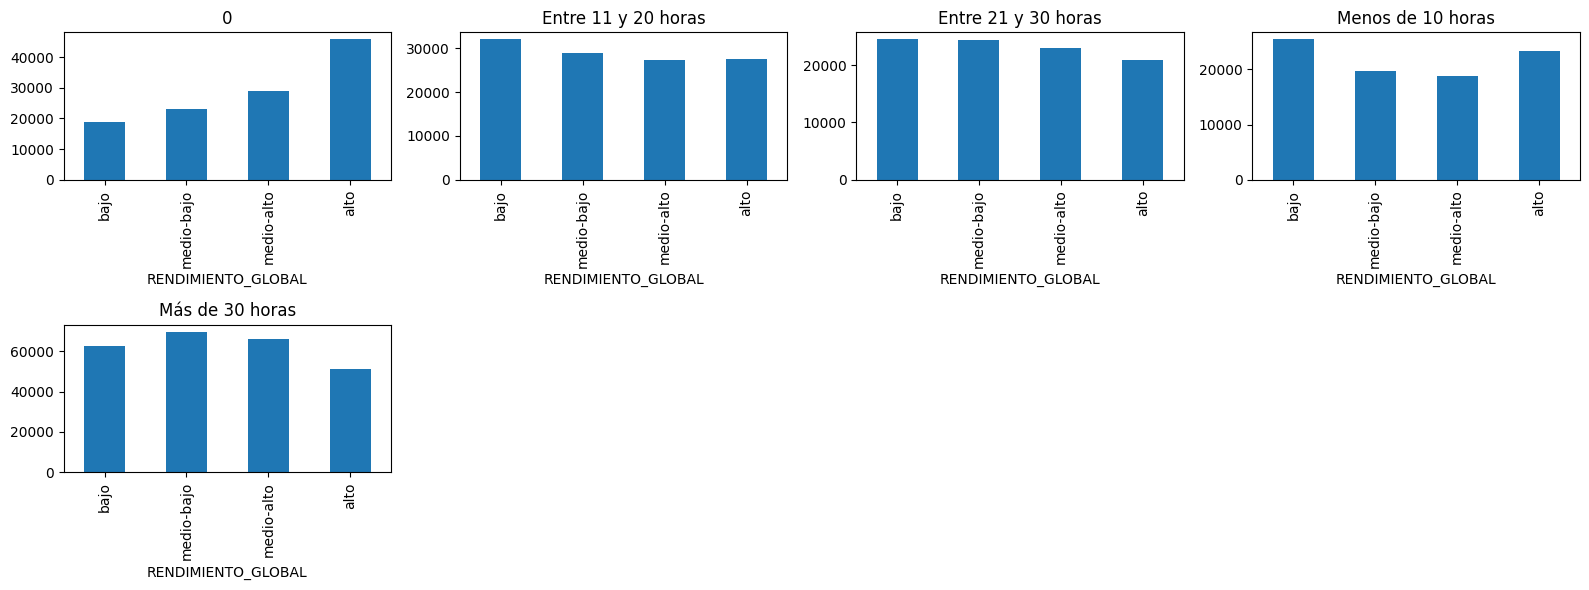

In [22]:
from rlxutils import subplots
import matplotlib.pyplot as plt

c = sorted(z.ESTU_HORASSEMANATRABAJA.value_counts().index)
for ax,ci in subplots(c, n_cols=4, usizex=4):
    zc = z[z.ESTU_HORASSEMANATRABAJA==ci]
    zc.RENDIMIENTO_GLOBAL.value_counts()[['bajo', 'medio-bajo', 'medio-alto', 'alto']].plot(kind='bar')
    plt.title(ci)

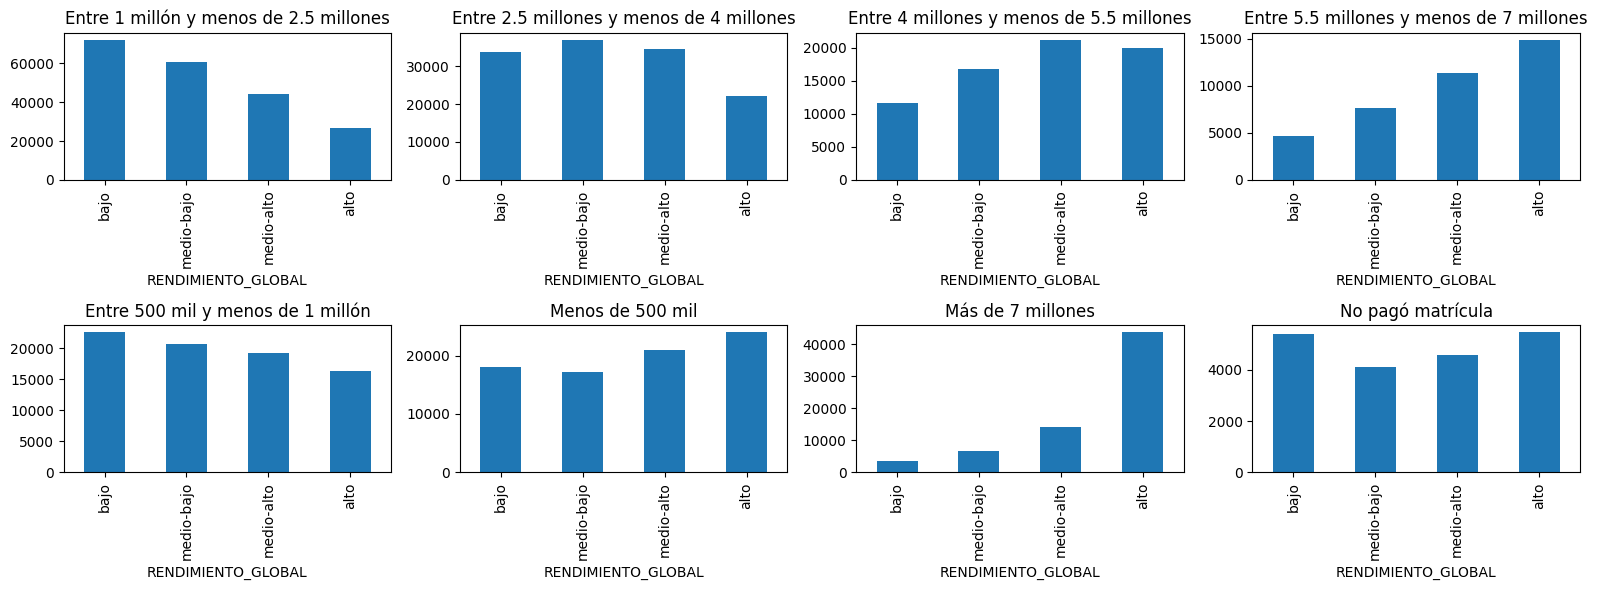

In [23]:
from rlxutils import subplots
import matplotlib.pyplot as plt

c = sorted(z.ESTU_VALORMATRICULAUNIVERSIDAD.value_counts().index)
for ax,ci in subplots(c, n_cols=4, usizex=4):
    zc = z[z.ESTU_VALORMATRICULAUNIVERSIDAD==ci]
    zc.RENDIMIENTO_GLOBAL.value_counts()[['bajo', 'medio-bajo', 'medio-alto', 'alto']].plot(kind='bar')
    plt.title(ci)